# Exploratory Data Analysis

In [1]:
# Importing standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # To ignore warnings
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('hepatitis_csv.csv')  # Reading the csv
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [3]:
data.shape  # Displays the shape of the dataframe

(155, 20)

### Observation 1
* Just by glancing over the data, we see that we have 155 data points and 20 features
* Its pretty clear that the target-variable here is 'class'

In [4]:
# Exploring the target variable- 'class'

data['class'].unique()

array(['live', 'die'], dtype=object)

In [5]:
data['class'].value_counts()

live    123
die      32
Name: class, dtype: int64

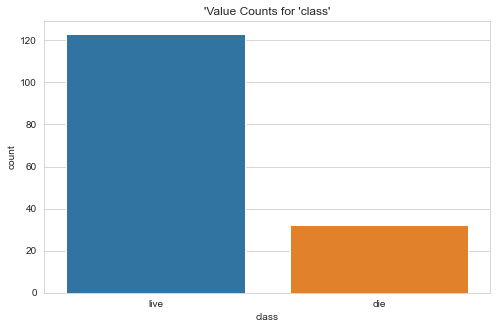

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data['class'])
plt.title("'Value Counts for 'class'")
plt.show()

### Observation 2
* We see that the data we're dealing with has a class imbalance. This information can later be crucial, at modelling stages to determine the best evalution metrics. 
The class 'live' has 123 occurences in the dataset whereas 'die' has 32 occurences. By looking at the dataset, it looks like the data given to us is about patients for whom certain symptoms were checked. And then the target variable - 'class' that has two values 'die' and 'live' could imply whether a patient X, survived after some N number of days given the presence or absenece of the defined symptoms.

## Missing Data

In [19]:
# Checking for missing data, if any

data.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

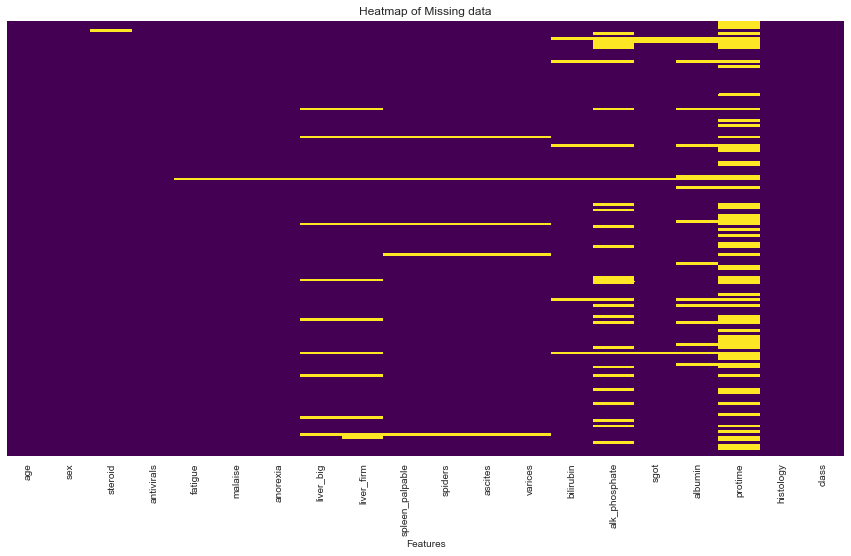

In [27]:
# Since there seems to be some missing data, we can visualize missing data using a heatmap to get idea of how 'mising' our features are

plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')
plt.title('Heatmap of Missing data')
plt.xlabel('Features')
plt.show()

In [32]:
# Checking the following features : ['alk_phosphate', 'protime'] since these are the top two features having the most missing data

print(f"For the feature 'alk_phosphate', we have {data['alk_phosphate'].isna().sum()} missing points that is {data['alk_phosphate'].isna().sum() / data.shape[0] * 100} % of total data")
print(f"For the feature 'protime', we have {data['protime'].isna().sum()} missing points that is {data['protime'].isna().sum() / data.shape[0] * 100} % of total data")

For the feature 'alk_phosphate', we have 29 missing points that is 18.70967741935484 % of total data
For the feature 'protime', we have 67 missing points that is 43.225806451612904 % of total data


In [33]:
# Looking at these two features to see what they are

data['alk_phosphate'].head()  # --> Numerical / continuous feature (18.7 % missing)

0     85.0
1    135.0
2     96.0
3     46.0
4      NaN
Name: alk_phosphate, dtype: float64

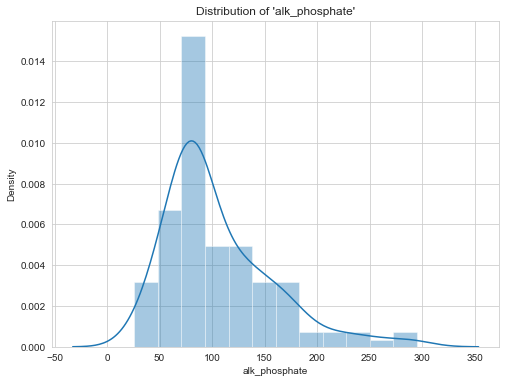

In [40]:
# Plotting the distribution for 'alk_phosphate'

plt.figure(figsize=(8,6))
sns.distplot(data['alk_phosphate'])
plt.title("Distribution of 'alk_phosphate'")
plt.show()

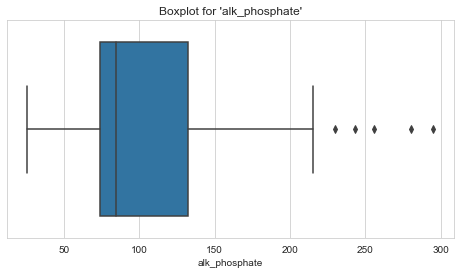

In [51]:
plt.figure(figsize=(8,4))
sns.boxplot(data['alk_phosphate'])
plt.title("Boxplot for 'alk_phosphate'")
plt.show()

In [37]:
data['protime'].head(20)  # --> This too is a numerical / continuous feature (43.22 % missing)

0      NaN
1      NaN
2      NaN
3     80.0
4      NaN
5     75.0
6      NaN
7      NaN
8      NaN
9      NaN
10    85.0
11    54.0
12    52.0
13    78.0
14     NaN
15    46.0
16     NaN
17    63.0
18    85.0
19    62.0
Name: protime, dtype: float64

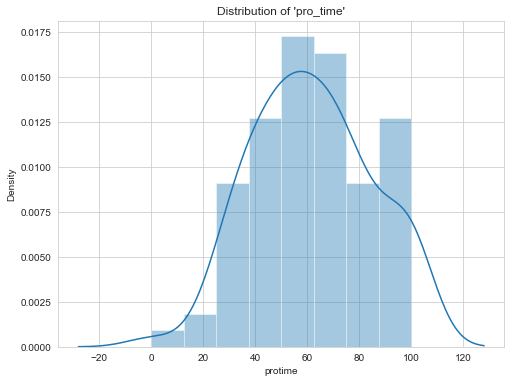

In [43]:
# Plotting the distribution for 'pro_time'

plt.figure(figsize=(8,6))
sns.distplot(data['protime'])
plt.title("Distribution of 'pro_time'")
plt.show()

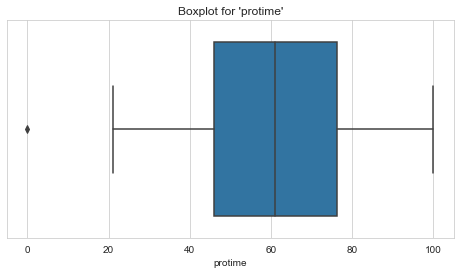

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(data['protime'])
plt.title("Boxplot for 'protime'")
plt.show()

### Key obseration for these two features 
* For 'alk_phosphate', we see that about 18% of the data is missing. This is not a LOT and can be dealt with using imputaion techniques (mean, median).
  Also, the distribution for 'alk_phosphate' seems to nearly gaussian (It is slightly right skewed). Since the skew is little, we can ignore it or if we wish to work 
  with linear models in future, we can apply Log on this feature since it follows a Log-normal distribution. Therefore, it'd make sense to not remove this feature as it can be 
  really helpful.
  Another key observation is that there are potential outliers in this feature that can later be dealt with.
* For 'pro_time', we see that about 43.2% data is missing. Now this is concerning, especially because we only have 155 data points in the entire dataset. 
  While 'pro_time' follows a nice, Gaussian distribution and has no outliers, it can be tricky to impute data simply because of how little we know about it. 
  At a stretch, we can try model-based imputation techniques, but that would work if we had more data to work with. Thus, it'd make sense to drop this feature.
  But for now, let's let it be in the dataset

## Exploring remaining features

In [54]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [131]:
# Lets separate categorical featues and numerical features for now (Ignoring afk_phosphate and pro_time)

num_feats = ['age', 'bilirubin', 'sgot', 'albumin','alk_phosphate', 'protime']
ignore_feats = ['alk_phosphate', 'protime', 'class', 'age', 'bilirubin', 'sgot', 'albumin']
cat_feats = [feat for feat in data.columns if feat not in ignore_feats]

In [132]:
cat_feats  # all the categorical / discrete features

['sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'histology']

## Exploring Numerical/Continuous features

In [133]:
num_feats  # These are the numerical features

['age', 'bilirubin', 'sgot', 'albumin', 'alk_phosphate', 'protime']

#### Age

In [72]:
data['age'].describe()

count    155.000000
mean      41.200000
std       12.565878
min        7.000000
25%       32.000000
50%       39.000000
75%       50.000000
max       78.000000
Name: age, dtype: float64

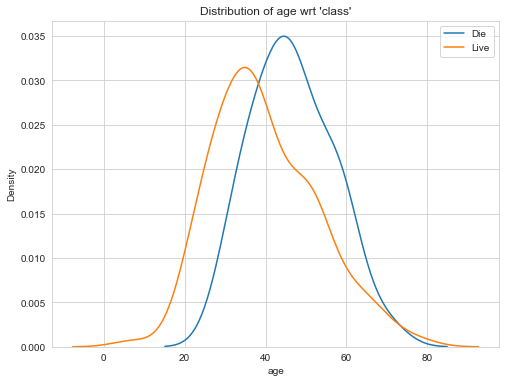

In [97]:
plt.figure(figsize=(8,6))

age_die = data[data['class'] == 'die']['age']
age_live = data[data['class'] == 'live'] ['age']

sns.distplot(age_die, hist=False, label='Die')
sns.distplot(age_live, hist=False, label='Live')
plt.title("Distribution of age wrt 'class'")

plt.legend()
plt.plot()
plt.show()

We see that 'age' can be a good feature for separating classes as the distrubutions do not completely overlap. Also, 'age' has a nice normal distribution

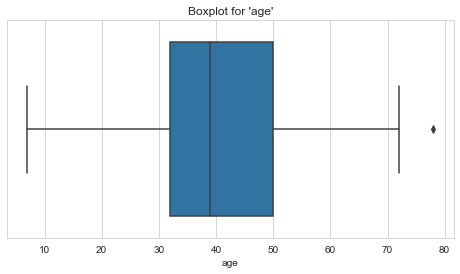

In [100]:
plt.figure(figsize=(8,4))
sns.boxplot(data['age'])
plt.title("Boxplot for 'age'")
plt.show()

There aren't any outliers here (except for one single instance which can be ignored)

#### Bilirubin

In [102]:
data['bilirubin'].describe()

count    149.000000
mean       1.427517
std        1.212149
min        0.300000
25%        0.700000
50%        1.000000
75%        1.500000
max        8.000000
Name: bilirubin, dtype: float64

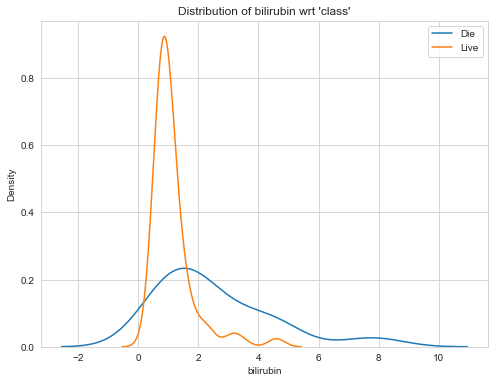

In [104]:
plt.figure(figsize=(8,6))

bil_die = data[data['class'] == 'die']['bilirubin']
bil_live = data[data['class'] == 'live'] ['bilirubin']

sns.distplot(bil_die, hist=False, label='Die')
sns.distplot(bil_live, hist=False, label='Live')
plt.title("Distribution of bilirubin wrt 'class'")

plt.legend()
plt.plot()
plt.show()

Here, too we can see that the distributions do not completely overlap and can help us distinguish between the two classes. Also, the feature is slightly right-skewed.

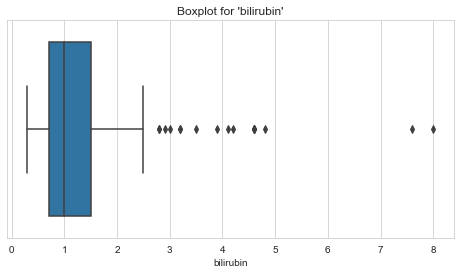

In [109]:
plt.figure(figsize=(8,4))
sns.boxplot(data['bilirubin'])
plt.title("Boxplot for 'bilirubin'")
plt.show()

We can see this feature has some outliers

#### Sgot

In [110]:
data['sgot'].describe()

count    151.00000
mean      85.89404
std       89.65089
min       14.00000
25%       31.50000
50%       58.00000
75%      100.50000
max      648.00000
Name: sgot, dtype: float64

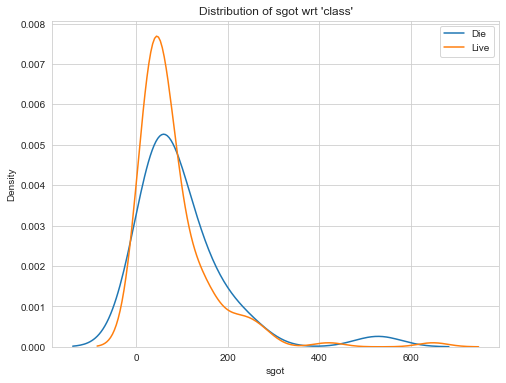

In [111]:
plt.figure(figsize=(8,6))

sgot_die = data[data['class'] == 'die']['sgot']
sgot_live = data[data['class'] == 'live'] ['sgot']

sns.distplot(sgot_die, hist=False, label='Die')
sns.distplot(sgot_live, hist=False, label='Live')
plt.title("Distribution of sgot wrt 'class'")

plt.legend()
plt.plot()
plt.show()

These distributions overlap a lot. This could imply that sgot might not help us a lot distinguish the classes much.

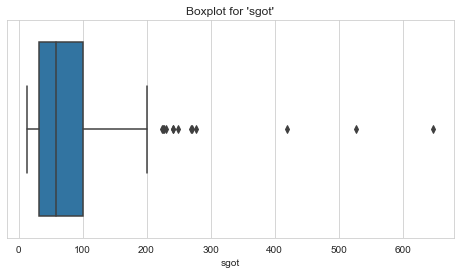

In [112]:
plt.figure(figsize=(8,4))
sns.boxplot(data['sgot'])
plt.title("Boxplot for 'sgot'")
plt.show()

This feature too has a few outliers

#### albumin

In [113]:
data['albumin'].describe()

count    139.000000
mean       3.817266
std        0.651523
min        2.100000
25%        3.400000
50%        4.000000
75%        4.200000
max        6.400000
Name: albumin, dtype: float64

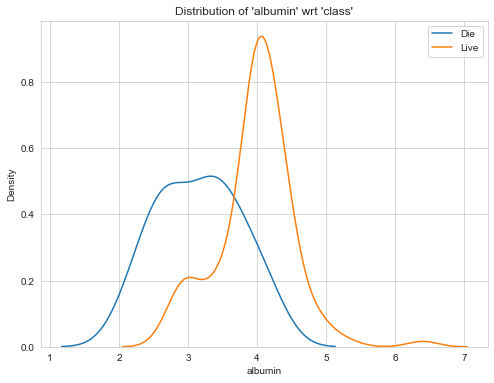

In [116]:
plt.figure(figsize=(8,6))

alb_die = data[data['class'] == 'die']['albumin']
alb_live = data[data['class'] == 'live'] ['albumin']

sns.distplot(alb_die, hist=False, label='Die')
sns.distplot(alb_live, hist=False, label='Live')
plt.title("Distribution of 'albumin' wrt 'class'")

plt.legend()
plt.plot()
plt.show()

This feature seems to be really intersting as the overlap in distributions is very less compared to what we've encountered so far. Thus this feature could turn out to be pivotal

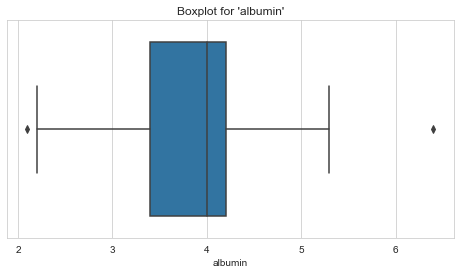

In [117]:
plt.figure(figsize=(8,4))
sns.boxplot(data['albumin'])
plt.title("Boxplot for 'albumin'")
plt.show()

No outliers whatsoever for this feature (Except 2 outliers, 1 at each end)

#### alk_phosphate

In [118]:
# Even though we've gone over this before, lets check wrt classes again for sanity

data['alk_phosphate'].describe()

count    126.000000
mean     105.325397
std       51.508109
min       26.000000
25%       74.250000
50%       85.000000
75%      132.250000
max      295.000000
Name: alk_phosphate, dtype: float64

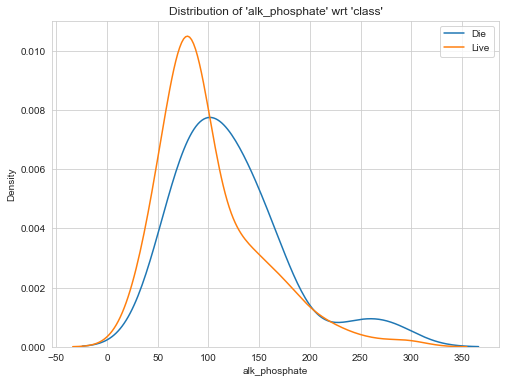

In [119]:
plt.figure(figsize=(8,6))

alk_phos_die = data[data['class'] == 'die']['alk_phosphate']
alk_phos_live = data[data['class'] == 'live'] ['alk_phosphate']

sns.distplot(alk_phos_die, hist=False, label='Die')
sns.distplot(alk_phos_live, hist=False, label='Live')
plt.title("Distribution of 'alk_phosphate' wrt 'class'")

plt.legend()
plt.plot()
plt.show()

Mostly overlapping, but can come in handy. We've also seen previously that this feature has a few outliers

#### protime

In [121]:
data['protime'].describe()

count     88.000000
mean      61.852273
std       22.875244
min        0.000000
25%       46.000000
50%       61.000000
75%       76.250000
max      100.000000
Name: protime, dtype: float64

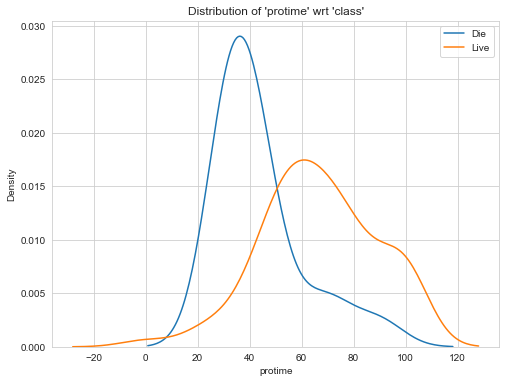

In [122]:
plt.figure(figsize=(8,6))

pro_die = data[data['class'] == 'die']['protime']
pro_live = data[data['class'] == 'live'] ['protime']

sns.distplot(pro_die, hist=False, label='Die')
sns.distplot(pro_live, hist=False, label='Live')
plt.title("Distribution of 'protime' wrt 'class'")

plt.legend()
plt.plot()
plt.show()

Now this is interesting. These distributions are mostly non-overlapping. But we also know that protime is the feature with most missing data (46%).
From what data we have this feature looks good for our task. But again, these overlapping distributions could also be because of our lack of data for protime.
This observation of non-overlapping features could further support the idea of using model-based imputation techniques in order to impute data for this feature simply because of how valuable it could be

### Checking for relationship between all numerical features

In [146]:
df_num = data[num_feats]  # Constructing a dataset from all numerical features
hue_param = data['class']
df_num['class'] = hue_param  # Adding the class to the dataframe

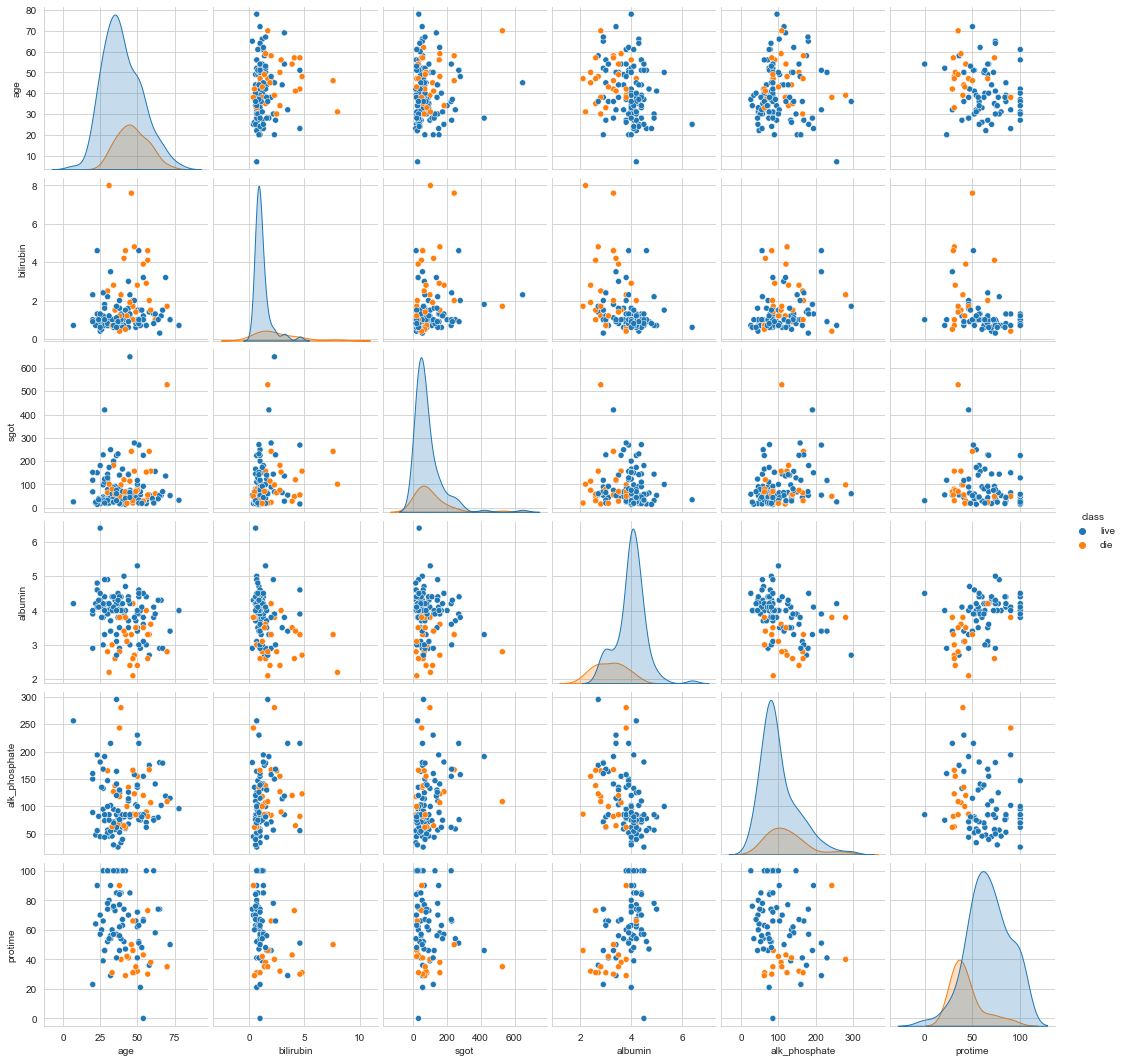

In [149]:
sns.pairplot(df_num, hue='class')
plt.show()

This plot gives us a lot of information and detail on how the numerical features interact and tells us about the underlying relationships between these features(scatter plots).
From the plot above we see that the most combinations of these features are overlapping instances but also differ to some extent. 
While it is clear that they're not linearly separable, these features can really come in handy when combined together since we can leverage the power of Non-Linear models later on.

## Categorical / Discrete data

In [150]:
# these are the categorical features we have

cat_feats

['sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'histology']

In [171]:
df_cat = data[cat_feats]
df_cat['class'] = data['class']
df_cat['class_encoded'] = df_cat['class'].map({'die':0,'live':1})

In [173]:
df_cat.head() # Here, live = 1 and die = 0

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class,class_encoded
0,male,False,False,False,False,False,False,False,False,False,False,False,False,live,1
1,female,False,False,True,False,False,False,False,False,False,False,False,False,live,1
2,female,True,False,True,False,False,True,False,False,False,False,False,False,live,1
3,female,NaN,True,False,False,False,True,False,False,False,False,False,False,live,1
4,female,True,False,False,False,False,True,False,False,False,False,False,False,live,1


### Sex

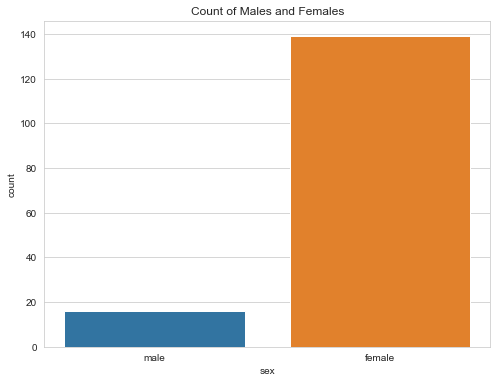

In [162]:
plt.figure(figsize=(8,6))
sns.countplot(df_cat['sex'])
plt.title('Count of Males and Females')
plt.plot()
plt.show()

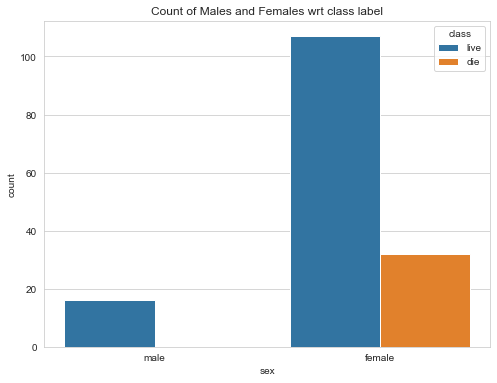

In [163]:
plt.figure(figsize=(8,6))
sns.countplot(df_cat['sex'], hue=df_cat['class'])
plt.title('Count of Males and Females wrt class label')
plt.plot()
plt.show()

The feature is clearly imbalanced and shows the dataset has very very few male patients.
Also, it is to be noted that there are no instances where the male patients die

### Steroid

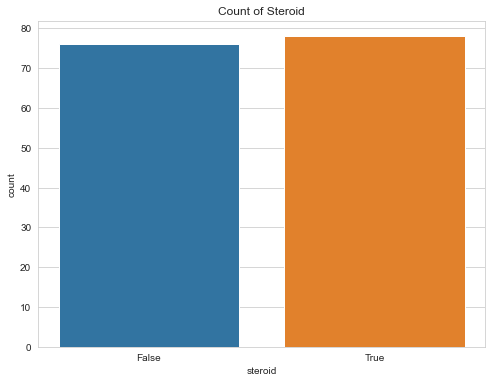

In [177]:
plt.figure(figsize=(8,6))
sns.countplot(df_cat['steroid'])
plt.title('Count of Steroid')
plt.plot()
plt.show()

There is no class imbalance which is great

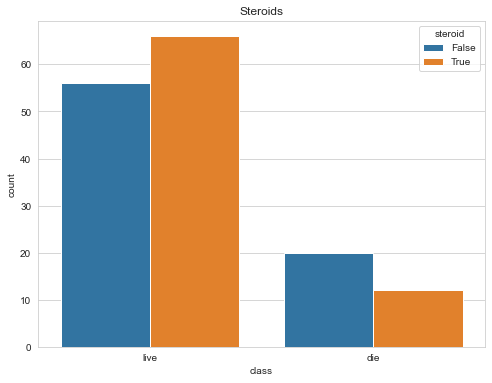

In [184]:
plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='steroid',data=df_cat)
plt.title('Steroids')
plt.show()

#### antivirals

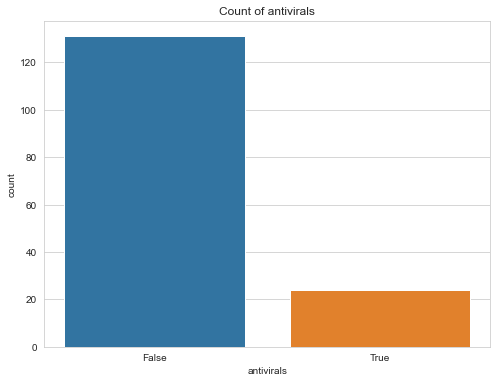

In [187]:
plt.figure(figsize=(8,6))
sns.countplot(df_cat['antivirals'])
plt.title('Count of antivirals')
plt.plot()
plt.show()

Here too we see imbalance

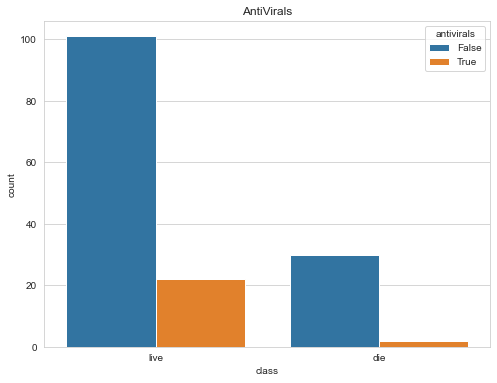

In [186]:
plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='antivirals', data=df_cat)
plt.title('AntiVirals')
plt.show()

## Observation
* Similar analysis can be done for the remaining categorical features (time constraint)
* From these 2 categorical features, the severe class imbalance has been brought to light because of which, when we model the data, the model could develop bias towards the 'live' class
  simply because it encounters it more often in the dataset
